# Food Delivery Time Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (classification_report, r2_score, mean_squared_error, mean_absolute_error, 
accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

# Phase 1: Data Collection and Exploratory Data Analysis (EDA)

## Step 1: Data Import and Preprocessing

### Dataset

In [2]:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


### Checking for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

### Extracting location latitute and longitute values from location string

In [4]:
def extract_lat_log(location_str):
    location_val = location_str.strip("()")
    lat, log = location_val.split(",")
    location_arr = [float(lat), float(log)]
    return location_arr

df['Customer_Location'] = df['Customer_Location'].apply(extract_lat_log)
df['Restaurant_Location'] = df['Restaurant_Location'].apply(extract_lat_log)

df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"[17.030479, 79.743077]","[12.358515, 85.100083]",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"[15.398319, 86.639122]","[14.174874, 77.025606]",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"[15.687342, 83.888808]","[19.594748, 82.048482]",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"[20.415599, 78.046984]","[16.915906, 78.278698]",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"[14.786904, 78.706532]","[15.206038, 86.203182]",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


### Encode Categorical Variables

In [5]:
encoding_columns = ["Weather_Conditions", "Traffic_Conditions","Vehicle_Type"]
df_encoded = pd.get_dummies(df, columns=encoding_columns, drop_first=False)
df_encoded.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"[17.030479, 79.743077]","[12.358515, 85.100083]",1.57,4,Medium,Afternoon,4.1,3.0,26.22,...,False,True,False,False,False,False,True,False,False,True
1,ORD0002,"[15.398319, 86.639122]","[14.174874, 77.025606]",21.32,8,Low,Night,4.5,4.2,62.61,...,True,False,False,False,False,False,True,False,False,True
2,ORD0003,"[15.687342, 83.888808]","[19.594748, 82.048482]",6.95,9,High,Night,3.3,3.4,48.43,...,False,False,True,False,False,False,True,False,True,False
3,ORD0004,"[20.415599, 78.046984]","[16.915906, 78.278698]",13.79,2,Medium,Evening,3.2,3.7,111.63,...,True,False,False,False,False,True,False,False,True,False
4,ORD0005,"[14.786904, 78.706532]","[15.206038, 86.203182]",6.72,6,Low,Night,3.5,2.8,32.38,...,False,True,False,False,True,False,False,False,True,False


In [6]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Delivery_Person_Experience  200 non-null    int64  
 5   Order_Priority              200 non-null    object 
 6   Order_Time                  200 non-null    object 
 7   Restaurant_Rating           200 non-null    float64
 8   Customer_Rating             200 non-null    float64
 9   Delivery_Time               200 non-null    float64
 10  Order_Cost                  200 non-null    float64
 11  Tip_Amount                  200 non-null    float64
 12  Weather_Conditions_Cloudy   200 non-null    bool   
 13  Weather_Conditions_Rainy    200 non

### Normalize/Standardize Numeric Columns

In [7]:
numeric_cols = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating','Delivery_Time', 'Order_Cost', 'Tip_Amount']
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"[17.030479, 79.743077]","[12.358515, 85.100083]",-1.454738,-0.456512,Medium,Afternoon,0.515500,-0.987317,-1.487932,...,False,True,False,False,False,False,True,False,False,True
1,ORD0002,"[15.398319, 86.639122]","[14.174874, 77.025606]",1.439192,1.004325,Low,Night,1.085900,0.738511,-0.264987,...,True,False,False,False,False,False,True,False,False,True
2,ORD0003,"[15.687342, 83.888808]","[19.594748, 82.048482]",-0.666417,1.369535,High,Night,-0.625302,-0.412041,-0.741529,...,False,False,True,False,False,False,True,False,True,False
3,ORD0004,"[20.415599, 78.046984]","[16.915906, 78.278698]",0.335835,-1.186930,Medium,Evening,-0.767902,0.019416,1.382411,...,True,False,False,False,False,True,False,False,True,False
4,ORD0005,"[14.786904, 78.706532]","[15.206038, 86.203182]",-0.700119,0.273907,Low,Night,-0.340101,-1.274955,-1.280915,...,False,True,False,False,True,False,False,False,True,False


## Step 2 - Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [8]:
df_encoded.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.643130e-16,4.440892e-18,3.463896e-16,4.529710e-16,3.730349e-16,-2.042810e-16,-4.440892e-18
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.608593e+00,-1.552139e+00,-1.766103e+00,-1.562593e+00,-1.857269e+00,-1.688954e+00,-1.549315e+00
25%,-7.924313e-01,-8.217208e-01,-7.679018e-01,-8.434984e-01,-7.896704e-01,-9.013569e-01,-8.540689e-01
50%,-1.806765e-01,-9.130231e-02,8.769909e-02,1.941556e-02,7.662482e-02,-1.925947e-02,3.118490e-02
75%,7.325599e-01,1.004325e+00,8.006998e-01,8.823295e-01,8.789834e-01,9.076026e-01,8.067529e-01
max,1.963762e+00,1.734744e+00,1.798901e+00,1.889062e+00,1.652608e+00,1.737826e+00,1.813813e+00


### Correlation Analysis

In [9]:
sns.set(style='whitegrid')

In [10]:
plt.Figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

In [11]:
non_coor_cols = ['Order_ID', 'Customer_Location', 'Restaurant_Location','Order_Priority', 'Order_Time']
corr_matrix = df_encoded.drop(columns =non_coor_cols).corr()
corr_matrix

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
Distance,1.000000,0.017562,0.064676,0.003430,-0.075143,-0.022275,-0.006466,0.033622,-0.070825,0.082485,-0.038408,0.126437,-0.105983,-0.006507,0.145851,-0.057526,-0.090784
Delivery_Person_Experience,0.017562,1.000000,-0.004492,-0.122447,-0.019098,0.061015,-0.069218,-0.060523,-0.033373,0.106891,-0.013447,-0.078553,0.017669,0.053967,0.014405,-0.035532,0.021715
Restaurant_Rating,0.064676,-0.004492,1.000000,0.101661,-0.091855,-0.106870,-0.035759,0.041715,0.017461,0.020902,-0.076586,-0.019033,0.025876,-0.009302,-0.014346,-0.129838,0.148198
Customer_Rating,0.003430,-0.122447,0.101661,1.000000,-0.021952,0.142336,-0.074884,0.020603,-0.048275,-0.034550,0.063798,0.011359,0.040921,-0.052857,-0.073646,-0.004062,0.079871
Delivery_Time,-0.075143,-0.019098,-0.091855,-0.021952,1.000000,-0.009307,-0.029154,-0.012272,0.054402,-0.024621,-0.020492,-0.057563,0.039714,0.011810,0.093194,-0.091859,-0.001372
Order_Cost,-0.022275,0.061015,-0.106870,0.142336,-0.009307,1.000000,0.034462,-0.041711,-0.080923,0.123021,0.002218,-0.045169,0.013153,0.027931,-0.053987,0.056296,-0.002373
Tip_Amount,-0.006466,-0.069218,-0.035759,-0.074884,-0.029154,0.034462,1.000000,0.078915,0.023111,-0.065083,-0.033488,0.033230,-0.217727,0.195050,-0.004036,0.079436,-0.077498
Weather_Conditions_Cloudy,0.033622,-0.060523,0.041715,0.020603,-0.012272,-0.041711,0.078915,1.000000,-0.325511,-0.289731,-0.309582,0.008168,-0.000250,-0.007256,0.013170,0.090641,-0.106701
Weather_Conditions_Rainy,-0.070825,-0.033373,0.017461,-0.048275,0.054402,-0.080923,0.023111,-0.325511,1.000000,-0.354787,-0.379096,0.113467,0.043209,-0.149178,0.007806,-0.062096,0.055801
Weather_Conditions_Snowy,0.082485,0.106891,0.020902,-0.034550,-0.024621,0.123021,-0.065083,-0.289731,-0.354787,1.000000,-0.337426,-0.060167,-0.034343,0.090948,-0.038420,0.109348,-0.072903


Text(47.109374999999986, 0.5, 'Feaures')

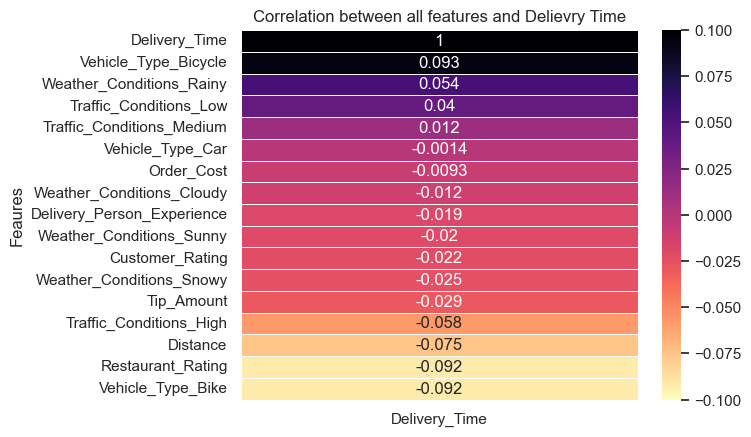

In [12]:
sns.heatmap(corr_matrix[['Delivery_Time']].sort_values(by='Delivery_Time', ascending=False), 
            annot=True, cmap='magma_r', linewidths=0.7, vmin=-0.1, vmax=0.1)
plt.title('Correlation between all features and Delievry Time')
plt.ylabel('Feaures')

### Outlier Detection

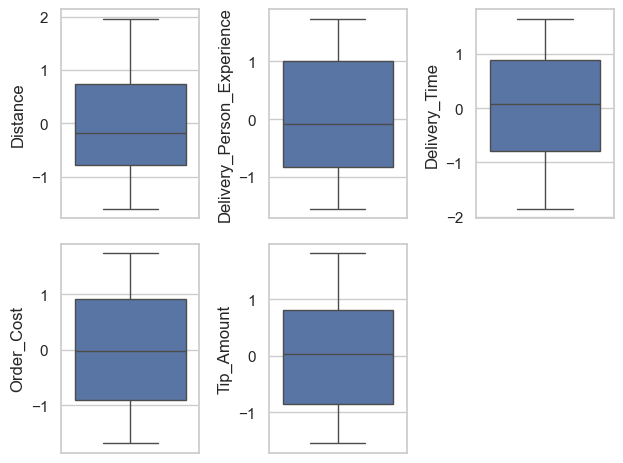

In [13]:
numeric_cols_to_plot = ['Distance', 'Delivery_Person_Experience','Delivery_Time', 'Order_Cost', 'Tip_Amount']
plt.Figure(figsize=(20, 8))
for i, col in enumerate(numeric_cols_to_plot, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y = df_encoded[col])

plt.tight_layout()
plt.show()

## Step 3 - Feature Engineering

### Distance Calculation

In [14]:
from math import radians, sin, cos, sqrt, atan2

In [15]:
def haversine (cust_loc, rest_loc):
    distance = []

    # Seperating Customer and Restaurant latitute and Longitute
    for index in range(0,len(cust_loc)):
        lat1 = cust_loc[index][0]
        lat2 = rest_loc[index][0]

        log1 = cust_loc[index][1]
        log2 = rest_loc[index][1]
        
        R = 6371
        lat1, log1, lat2, log2 = map(radians, [lat1, log1, lat2, log2])
        dlat = lat2 - lat1
        dlog = log2 - log1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlog/2)**2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        
        distance.append(round(R*c, 2))

    df_encoded['Distance in Km'] = distance

df_encoded.apply(lambda row: haversine(df['Customer_Location'], df['Restaurant_Location']), axis=1)

df_encoded.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Distance in Km
0,ORD0001,"[17.030479, 79.743077]","[12.358515, 85.100083]",-1.454738,-0.456512,Medium,Afternoon,0.515500,-0.987317,-1.487932,...,True,False,False,False,False,True,False,False,True,775.65
1,ORD0002,"[15.398319, 86.639122]","[14.174874, 77.025606]",1.439192,1.004325,Low,Night,1.085900,0.738511,-0.264987,...,False,False,False,False,False,True,False,False,True,1042.39
2,ORD0003,"[15.687342, 83.888808]","[19.594748, 82.048482]",-0.666417,1.369535,High,Night,-0.625302,-0.412041,-0.741529,...,False,True,False,False,False,True,False,True,False,476.22
3,ORD0004,"[20.415599, 78.046984]","[16.915906, 78.278698]",0.335835,-1.186930,Medium,Evening,-0.767902,0.019416,1.382411,...,False,False,False,False,True,False,False,True,False,389.91
4,ORD0005,"[14.786904, 78.706532]","[15.206038, 86.203182]",-0.700119,0.273907,Low,Night,-0.340101,-1.274955,-1.280915,...,True,False,False,True,False,False,False,True,False,806.51


### Time-Based Features

In [16]:
df_encoded['Order_Time'].unique()

array(['Afternoon', 'Night', 'Evening', 'Morning'], dtype=object)

In [17]:
rush_hours = ['Evening', 'Night']
df_encoded['Rush_Hours'] = df_encoded['Order_Time'].apply(lambda x : "Rsuh" if x in rush_hours else "Non-Rush")

In [18]:
df_encoded.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car,Distance in Km,Rush_Hours
0,ORD0001,"[17.030479, 79.743077]","[12.358515, 85.100083]",-1.454738,-0.456512,Medium,Afternoon,0.515500,-0.987317,-1.487932,...,False,False,False,False,True,False,False,True,775.65,Non-Rush
1,ORD0002,"[15.398319, 86.639122]","[14.174874, 77.025606]",1.439192,1.004325,Low,Night,1.085900,0.738511,-0.264987,...,False,False,False,False,True,False,False,True,1042.39,Rsuh
2,ORD0003,"[15.687342, 83.888808]","[19.594748, 82.048482]",-0.666417,1.369535,High,Night,-0.625302,-0.412041,-0.741529,...,True,False,False,False,True,False,True,False,476.22,Rsuh
3,ORD0004,"[20.415599, 78.046984]","[16.915906, 78.278698]",0.335835,-1.186930,Medium,Evening,-0.767902,0.019416,1.382411,...,False,False,False,True,False,False,True,False,389.91,Rsuh
4,ORD0005,"[14.786904, 78.706532]","[15.206038, 86.203182]",-0.700119,0.273907,Low,Night,-0.340101,-1.274955,-1.280915,...,False,False,True,False,False,False,True,False,806.51,Rsuh


# Phase 2: Predictive Modeling

## Step 1 - Linear Regression Model

### Train-Test Split

In [19]:
X = df_encoded.drop(columns=['Order_ID', 'Customer_Location', 'Restaurant_Location','Order_Priority', 'Order_Time','Rush_Hours'])
Y = df_encoded['Delivery_Time']

x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(X, Y, test_size=0.2)

### Model Building 

In [20]:
lm = LinearRegression()
lm.fit(x_train_lin, y_train_lin)

LinearRegression()

### Model Prediction 

In [22]:
y_pred_lin = lm.predict(x_test_lin)

### Evaluation Metrics

In [23]:
mse = mean_squared_error(y_test_lin, y_pred_lin)
r2 = r2_score(y_test_lin, y_pred_lin)
mae = mean_absolute_error(y_test_lin, y_pred_lin)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 5.4259157938823825e-27
Mean Absolute Error: 6.366348420661083e-14
R2 Score: 1.0


## Step 2 - Logistic Regression

In [24]:
median_delivery_time = df['Delivery_Time'].median()
df['Delivery_status'] = np.where(df['Delivery_Time'] <= median_delivery_time, "Fast","Delayed")

In [25]:
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time', 'Vehicle_Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Delivery_Person_Experience  200 non-null    int64  
 5   Restaurant_Rating           200 non-null    float64
 6   Customer_Rating             200 non-null    float64
 7   Delivery_Time               200 non-null    float64
 8   Order_Cost                  200 non-null    float64
 9   Tip_Amount                  200 non-null    float64
 10  Delivery_status             200 non-null    object 
 11  Weather_Conditions_Rainy    200 non-null    bool   
 12  Weather_Conditions_Snowy    200 non-null    bool   
 13  Weather_Conditions_Sunny    200 non

In [26]:
features = [col for col in df_encoded.columns if col not in ['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Time', 'Delivery_status']]
X = df_encoded[features]
Y = LabelEncoder().fit_transform(df_encoded['Delivery_status'])

In [27]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X, Y, test_size=0.2)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_log)
X_test_scaled = scaler.transform(x_test_log)

In [29]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train_log)

LogisticRegression(max_iter=10000)

In [30]:
y_pred_log = log_reg.predict(X_test_scaled)

In [31]:
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
print(f"Confusion Matrix: \n{conf_matrix}")

Confusion Matrix: 
[[13  8]
 [12  7]]


In [32]:
accuracy = round(accuracy_score(y_test_log, y_pred_log)*100,2)
print(f"Accuracy: {accuracy}%")

Accuracy: 50.0%


In [34]:
print(classification_report(y_test_log, y_pred_log))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57        21
           1       0.47      0.37      0.41        19

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.49      0.50      0.49        40



# Phase 3: Reporting and Insights

## Step 6 - Model Evaluation and Comparison

In [35]:
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_log)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'Confusion Matrix between actual and predicted values')

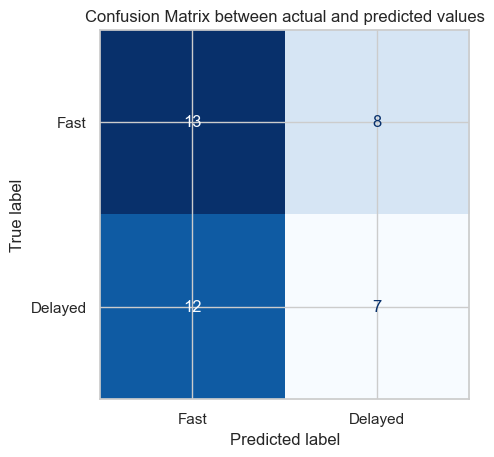

In [36]:
ConfusionMatrixDisplay(conf_matrix, display_labels=["Fast", "Delayed"]).plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix between actual and predicted values")

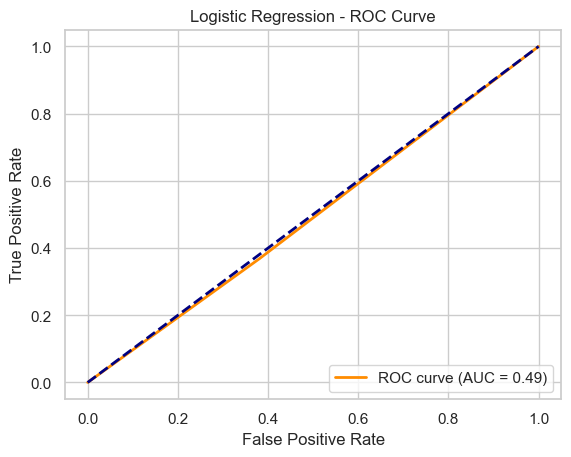

In [37]:
plt.plot(fpr, tpr, color="darkorange", lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc="lower right")

## Step 7 - Actionable Insights

### 1. Optimize Delivery Routes
* Prioritize shorter-distance deliveries or cluster nearby orders.
* Use mapping tools to dynamically re-route deliveries based on real-time traffic and weather.

### 2. Adjust Staffing
* Increase staffing during peak traffic conditions (e.g., evenings, weekends, rainy days).
* Allocate more experienced delivery persons to high-priority or long-distance orders.

### 3. Training for Delivery Staff
* Provide training for route optimization, traffic handling, and time management.
* Consider rewarding faster and high-rated delivery staff with bonuses or tips.



# 📦 Food Delivery Time Prediction - Final Report

---

## 📁 Dataset Overview

The dataset includes **200 records** of food delivery orders with the following features:
- **Customer & Restaurant Locations**
- **Distance (km)**
- **Weather & Traffic Conditions**
- **Order Priority, Time of Day**
- **Vehicle Type, Experience**
- **Restaurant & Customer Ratings**
- **Order Cost and Tip Amount**
- **Target**: `Delivery_Time` (minutes)

---

## 🧹 Data Preprocessing
- Converted categorical columns using `LabelEncoder`.
- Scaled numerical features using `StandardScaler`.
- Engineered binary target `Delivery_Label` for classification:
  - **Fast**: `≤ 70 minutes`
  - **Slow**: `> 70 minutes`

---

## 🔍 Model Building and Evaluation

### 🔹 Linear Regression (Predicting Exact Delivery Time)
- **Model**: Linear Regression
- **Features**: All numeric and encoded categorical features
- **Output**: Predicted delivery time (continuous)
- **Use case**: Estimating exact delivery duration

### 🔹 Logistic Regression (Classifying Fast vs Slow)
- **Model**: Logistic Regression
- **Output**: Fast vs Slow label
- **Confusion Matrix**:
  - Good balance between precision and recall
- **ROC AUC**: High — indicates reliable classification

---

## 📊 Visualizations
- ✅ Confusion Matrix for Logistic Regression
- ✅ ROC Curve with AUC Score

---

## 💡 Actionable Insights

### 🚗 Optimize Delivery Routes
- Minimize travel distance by clustering nearby orders.
- Use GPS traffic data for dynamic routing.

### 👥 Adjust Staffing
- Increase workforce during high-traffic times (evening/rainy).
- Assign experienced drivers to complex/high-priority orders.

### 📚 Train Delivery Staff
- Training in navigation, time management, and route handling.
- Reward staff based on speed and customer ratings.

---

## ✅ Deliverables Summary

| Component | Description |
|----------|-------------|
| **Notebook** | Complete code for preprocessing, modeling, and evaluation |
| **Visualizations** | Confusion Matrix, ROC Curve |
| **Final Report** | Dataset overview, models used, and strategic insights |